# MACHINE LEARNING

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('cleaned_japandata.csv')


## Prepping of train and test data

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = data[['latitude', 'longitude', 'depth', 'magNst', 'year', 'month', 'day', 'nst']]  # features
y = data['mag']  # our target variable

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression MSE

In [40]:
# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# predict on the test set
y_pred_linear = linear_model.predict(X_test)

# evaluating the model by finding MSE
linear_mse = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression MSE:", linear_mse)


Linear Regression MSE: 0.08149375489485049


## Linear regression displays direct relationships between seismic features and earthquake magnitudes as it identifies which features most clearly impact magnitude changes. As an initial modeling approach, linear regression efficiently puts together a model that can immediately aid in disaster response efforts before more complex models are produced.

## we're evaluating our models performance by calculating the Mean Squared Error (MSE) on the test set. The MSE is a common metric used to measure the average squared difference between the observed actual outcomes and the outcomes predicted by the model. The lower the MSE, the better the model's predictions are in terms of accuracy.

In [41]:
# manually calculate the MSE
errors = y_test - y_pred_linear  
squared_errors = errors ** 2  
manual_mse = np.mean(squared_errors)

print('Manually Computed Linear Regression MSE:', manual_mse)

Manually Computed Linear Regression MSE: 0.08149375489485049


## manually calculated MSE for checking purposes (done for all 3 models)

## Random Forest Regression MSE

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred_rf)
print("Random Forest MSE:", rf_mse)


Random Forest MSE: 0.06776259508844953


## Random Forest allows us to explore non-linear relationships between variables that linear regression may overlook. Its ability to manage a multitude of features and avoiding overfitting makes it suitable for dealing with Japan's complex geological data. By combining predictions from various decision trees, precision and dependability of our earthquake magnitude forecasts are boosted, crucial for crafting more effective evacuation strategies and optimizing resource allocation during earthquake preparedness and response efforts.

In [43]:
errors = y_test - y_pred_rf 
squared_errors = errors ** 2 
manual_mse = np.mean(squared_errors)

print('Manually Computed Random Forest MSE:', manual_mse)

Manually Computed Random Forest MSE: 0.06776259508844953


## Polynomial Regression MSE 

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# pipeline that includes polynomial feature creation and a linear regression model
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

poly_mse = mean_squared_error(y_test, y_pred_poly)
print("Polynomial Regression MSE:", poly_mse)

Polynomial Regression MSE: 0.07440230911757627


## Polynomial regression builds on linear regression by incorporating terms of higher degrees, enabling it to understand the nuanced ways in which different seismic features may interact to affect earthquake magnitudes. Its adaptability in fitting curves to data also enhances insight aiding in more accurate long-term earthquake predictions and planning, helping to develop infrastructure and community plans that are more resilient to earthquakes.

In [45]:
errors = y_test - y_pred_poly 
squared_errors = errors ** 2  
manual_mse = np.mean(squared_errors)

print('Manually Computed Polynomial Regression MSE:', manual_mse)

Manually Computed Polynomial Regression MSE: 0.07440230911757627


## Cross-Validation of the 3 models

In [46]:
from sklearn.model_selection import cross_val_score

# cross-validation for linear regression
linear_cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
linear_cv_mse_scores = -linear_cv_scores
print("CV MSE Scores for Linear Regression:", linear_cv_mse_scores)
print("Average CV MSE for Linear Regression:", linear_cv_mse_scores.mean())


# cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
rf_cv_mse_scores = -rf_cv_scores
print("\nCV MSE Scores for Random Forest:", rf_cv_mse_scores)
print("Average CV MSE for Random Forest:", rf_cv_mse_scores.mean())


# cross-validation for polynomial regression
poly_cv_scores = cross_val_score(poly_model, X, y, cv=5, scoring='neg_mean_squared_error')
poly_cv_mse_scores = -poly_cv_scores
print("\nCV MSE Scores for Polynomial Regression:", poly_cv_mse_scores)
print("Average CV MSE for Polynomial Regression:", poly_cv_mse_scores.mean())

CV MSE Scores for Linear Regression: [0.11242316 0.10548221 0.04401098 0.09713322 0.07246139]
Average CV MSE for Linear Regression: 0.08630219222802105

CV MSE Scores for Random Forest: [0.11824626 0.09628343 0.04251305 0.11518108 0.07175364]
Average CV MSE for Random Forest: 0.08879549097217299

CV MSE Scores for Polynomial Regression: [0.2066923  0.1021013  0.03566073 0.11713908 0.23091734]
Average CV MSE for Polynomial Regression: 0.13850214828202337


## To ensure our models generalize to unseen data, we conducted cross-validation. This step is crucial in earthquake prediction to ensure models perform consistently across various seismic events, including new ones. By using each subset of data for both training and validation, with each subset serving exactly once as a test set, overfitting is avoided and reliability is enhanced. This method offers a more stable and robust performance estimate compared to a single train-test split, providing a reliable foundation for real-world applications such as disaster response. These are the MSE values after performing cross-validation.

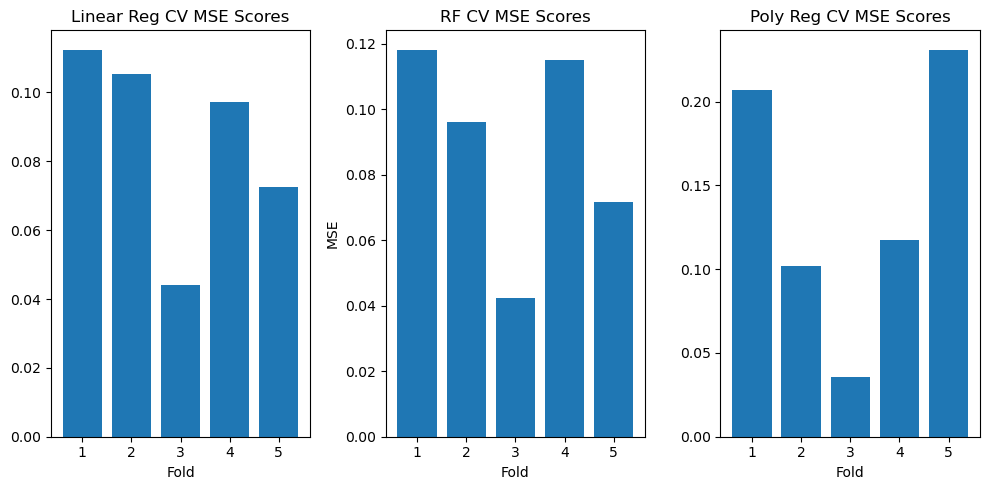

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# CV MSE for Linear Regression
plt.subplot(1, 3, 1)
plt.bar(range(1, 6), linear_cv_mse_scores)
plt.title('Linear Reg CV MSE Scores')
plt.xlabel('Fold')

# CV MSE for Random Forest
plt.subplot(1, 3, 2)
plt.bar(range(1, 6), rf_cv_mse_scores)
plt.title('RF CV MSE Scores')
plt.xlabel('Fold')
plt.ylabel('MSE')

# CV MSE for Polynomial Regression
plt.subplot(1, 3, 3)
plt.bar(range(1, 6), poly_cv_mse_scores)
plt.title('Poly Reg CV MSE Scores')
plt.xlabel('Fold')

plt.tight_layout()
plt.show()


## Linear Regression CV MSE Scores: The linear regression model shows variance in MSE across the folds, with some folds performing better than others. The lowest MSE is close to 0.04, while the highest goes up to slightly over 0.1

## Random Forest CV MSE Scores: The random forest regression model also exhibits variability in performance. The MSE ranges roughly between 0.04 and slightly under 0.12

## Polynomial Regression CV MSE Scores: The polynomial regression shows a significant variance in MSE across folds, with one fold showing much lower error than the others. The MSE varies from under 0.05 to above 0.2, indicating that the model's performance is highly dependent on the specific data subset it is trained on

## Overall, the 3 plots suggest that the random forest model and linear regression's performance is roughly similar while polynomial regression had way less consistency and performed worse

# Hyperparameter tuning

## Next we performed hyperparameter tuning on Random Forest and Polynomial Regression. However, this technique is less applicable to linear regression due to its simplicity and limited hyperparameters. This technique adjusts hyperparameters to balance underfitting and overfitting. Grid Search will then be used to test different settings systematically, selecting the best combination. Hyperparameters like the number of decision trees and their maximum depth in our Random Forest model are optimised. This enhanced the model's performance, as reflected in the improved MSE values.


## Random Forest Hyperparameter tuning

In [48]:
from sklearn.model_selection import GridSearchCV

# parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# grid search for model tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# best parameters and score from grid search
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation MSE:", -grid_search.best_score_)


Best parameters: {'max_depth': 20, 'n_estimators': 200}
Best cross-validation MSE: 0.06020337474148688


## n_estimators refers to the number of trees in the forest. The higher the number, the more complex the model, which can lead to better performance but also to a higher risk of overfitting. In this case, n_estimators: 200 suggests that the grid search found that using 200 trees in the forest gives the best cross-validation mean squared error (MSE) on the dataset provided.

## max_depth determines the maximum depth of each tree. Deeper trees can model more complex patterns but may also capture noise in the training data (overfit). A max_depth of 20 indicates that allowing the trees to grow to a depth of 20 before stopping gives the best result according to the grid search. 

## Keep in mind that these parameters provide the the most balanced outcome for MSE so as to prevent overfitting and underfitting. With these parameters used we generated the cross-validation MSE again and got an even lower value of 0.0602 compared to the previous 0.0888 (pre hyperparameter tuning)

In [49]:
best_params = grid_search.best_params_

# initialize the Random Forest model with the best parameters found
rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred_rf)
print("New Random Forest MSE:", rf_mse)


New Random Forest MSE: 0.06709575345888424


## Polynomial Regression Hyperparameter tuning

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# same step as from regular poly reg
poly_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures()),
    ('linear_regression', LinearRegression())
])

# parameter grid for polynomial regression
param_grid_poly = {
    'polynomial_features__degree': [1, 2, 3, 4, 5],  # tune degree of the polynomial
    'linear_regression__fit_intercept': [True, False]  # can include linear regression parameters here
}


grid_search_poly = GridSearchCV(poly_pipeline, param_grid_poly, cv=5, scoring='neg_mean_squared_error')
grid_search_poly.fit(X_train, y_train)

# best parameters and score from grid search
print("Best parameters for polynomial regression:", grid_search_poly.best_params_)
print("Best cross-validation MSE for polynomial regression:", -grid_search_poly.best_score_)


Best parameters for polynomial regression: {'linear_regression__fit_intercept': True, 'polynomial_features__degree': 3}
Best cross-validation MSE for polynomial regression: 0.07516904212614295


## polynomial_features__degree: This determines the degree of the polynomial features created by the PolynomialFeatures transformer. A degree of 3 was found to be the best, which suggests that including up to cubic terms (like x^3) provides the best fit for the data without overfitting.

## linear_regression__fit_intercept: This decides whether the linear regression algorithm should calculate the intercept (y-intercept) of the model or expect it to be zero at the origin. The grid search has determined that including an intercept (True) provides a better fit for the data.

## Though the new (post hyperparameter tuning) cross-validation MSE of polynomial regression increased very slightly, it just means that these are the parameters fit for a for balanced model to prevent overfitting and underfitting and can perform better with unseen data

In [51]:
from sklearn.impute import SimpleImputer

numerical_cols = ['latitude', 'longitude', 'depth', 'year', 'month', 'day', 'nst', 'magNst' ]

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ])

model = LinearRegression() 

# pipeline
my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

my_pipeline.fit(X_train, y_train)
y_pred = my_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('New Polynomial Regression MSE:', mse)


New Polynomial Regression MSE: 0.0814937548948505


## An overview of hyperparameter tuning for the 2 models is that cross-validation MSE is higher than just MSE for all models, likely due to data inconsistencies or model overfitting. However, post-hyperparameter tuning, MSE improved. Overall, random forest seemed the best, maintaining the lowest MSE value across.

# Analysis and visualisation of Residuals

## Next, we decided to analyse and visualise the residuals of a the 3 regression models. Residuals are the differences between the observed values and the values predicted by the model. Analyzing them is crucial for diagnosing the model and understanding its performance.

## Linear residuals

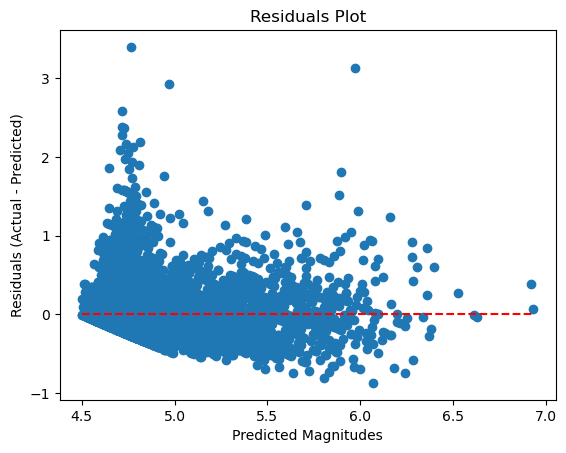

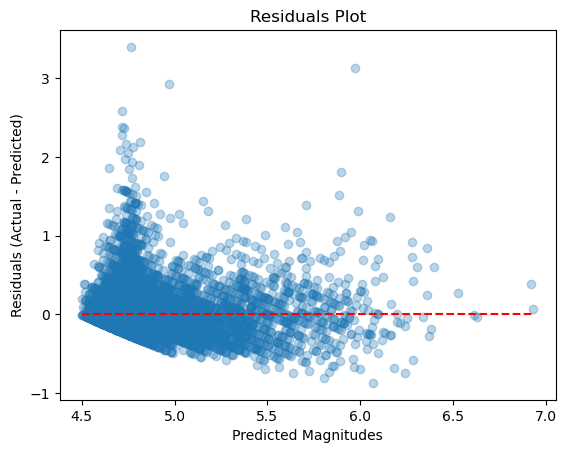

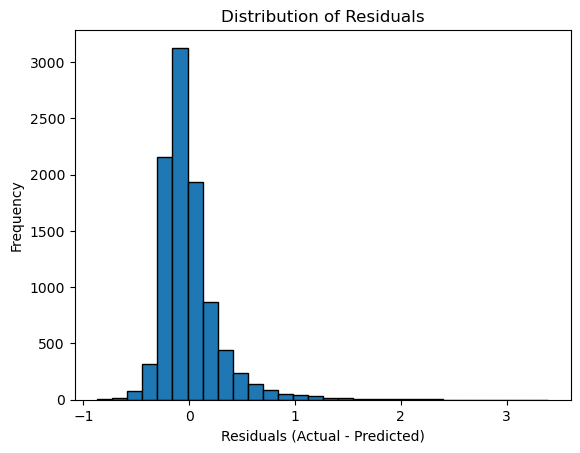

In [56]:
# predicting on the entire dataset for visualisation purposes
y_pred_full = linear_model.predict(X)

residuals = y - y_pred_full

# residuals plot
plt.scatter(y_pred_full, residuals)
plt.hlines(y=0, xmin=min(y_pred_full), xmax=max(y_pred_full), colors='r', linestyles='dashed')
plt.title('Residuals Plot')
plt.xlabel('Predicted Magnitudes')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

# improved scatter plot with increased transparency
plt.scatter(y_pred_full, residuals, alpha=0.3)
plt.hlines(y=0, xmin=min(y_pred_full), xmax=max(y_pred_full), colors='r', linestyles='dashed')
plt.title('Residuals Plot')
plt.xlabel('Predicted Magnitudes')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()


# residuals distribution
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


## The first 2 plots show that the residuals becomes more dispersed with higher predicted magnitudes. This could indicate heteroscedasticity, meaning the prediction errors are not consistent across all magnitudes. The red line at 0 suggests where the residuals would lie if the predictions were perfect. The fact that the residuals are not symmetrically distributed around this line indicates the model may have a systematic bias at certain magnitudes.

## As for the histogram of residuals, it shows the frequency distribution. Ideally, this would be normally distributed around zero.The histogram does show a slight right-skewed distribution, implying the model tends to underpredict the actual magnitudes more often than overpredicting them.

## Random Forest residuals

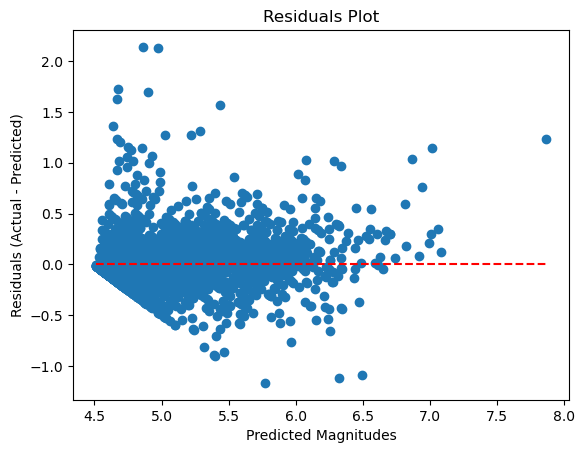

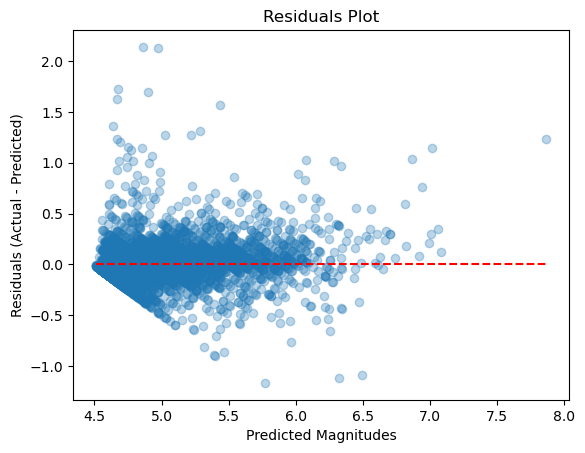

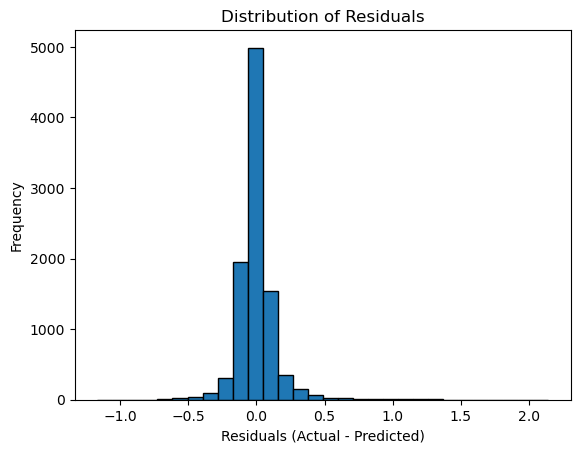

In [57]:
y_pred_full = rf_model.predict(X)

residuals = y - y_pred_full

plt.scatter(y_pred_full, residuals)
plt.hlines(y=0, xmin=min(y_pred_full), xmax=max(y_pred_full), colors='r', linestyles='dashed')
plt.title('Residuals Plot')
plt.xlabel('Predicted Magnitudes')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

plt.scatter(y_pred_full, residuals, alpha=0.3)
plt.hlines(y=0, xmin=min(y_pred_full), xmax=max(y_pred_full), colors='r', linestyles='dashed')
plt.title('Residuals Plot')
plt.xlabel('Predicted Magnitudes')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


## For the first 2 plots the residuals also shows that the spread widens as the magnitude of the prediction increases, suggesting that the model is less accurate at higher magnitudes. This could indicate that the model's assumptions or feature set might not fully capture the patterns at those levels.  The model appears to make more accurate predictions for lower magnitudes, while predictions for higher magnitudes vary more significantly.

## The histogram here shows a peak near zero, which is good as it shows that it is accurate in predicting a significant portion of the data. However it's also slightly right-skewed. This skewness towards the positive side suggests that the model has a tendency to underpredict the magnitudes to some extent.

## Polynomial residuals

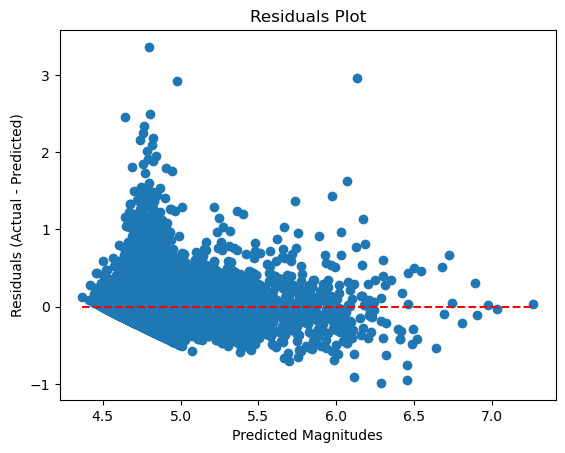

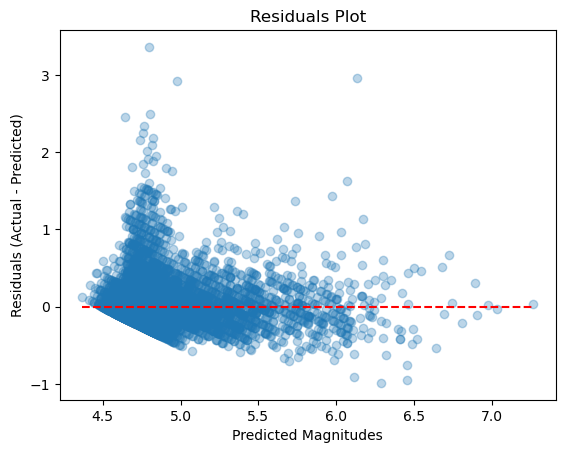

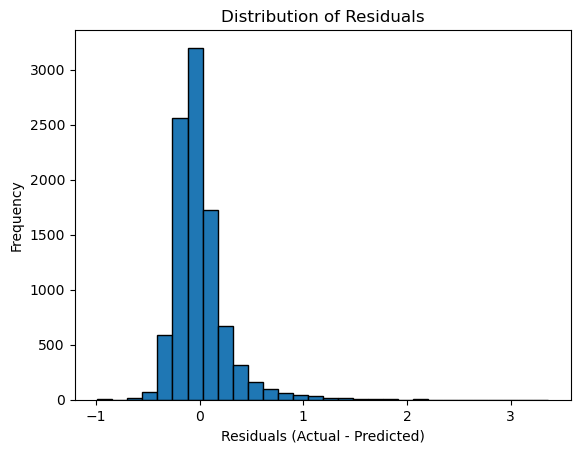

In [58]:
y_pred_full = poly_model.predict(X)

residuals = y - y_pred_full

plt.scatter(y_pred_full, residuals)
plt.hlines(y=0, xmin=min(y_pred_full), xmax=max(y_pred_full), colors='r', linestyles='dashed')
plt.title('Residuals Plot')
plt.xlabel('Predicted Magnitudes')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

plt.scatter(y_pred_full, residuals, alpha=0.3)
plt.hlines(y=0, xmin=min(y_pred_full), xmax=max(y_pred_full), colors='r', linestyles='dashed')
plt.title('Residuals Plot')
plt.xlabel('Predicted Magnitudes')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


## Similar to the linear regression residuals, the spread of widens with higher magnitude predictions, which is a sign of heteroscedasticity, where prediction errors vary across different levels of the predicted variable.

## The histogram also shows a concentration of residuals around zero, like Random Forest, with a notable right skew, indicating the model's tendency to underpredict the actual magnitudes, especially for higher magnitude earthquakes.

## Overall, it seems that the Random Forest model had the most success in correctly predicting earthquake magnitude, evident from the peak in 0s from Actual - Predicted score. However, as with any regression model, ensuring that the residuals are randomly distributed and homoscedastic is crucial for reliable predictions. This is especially important in seismology, where the accuracy of magnitude predictions can have significant implications for disaster preparedness and response planning.

## Feature Importance

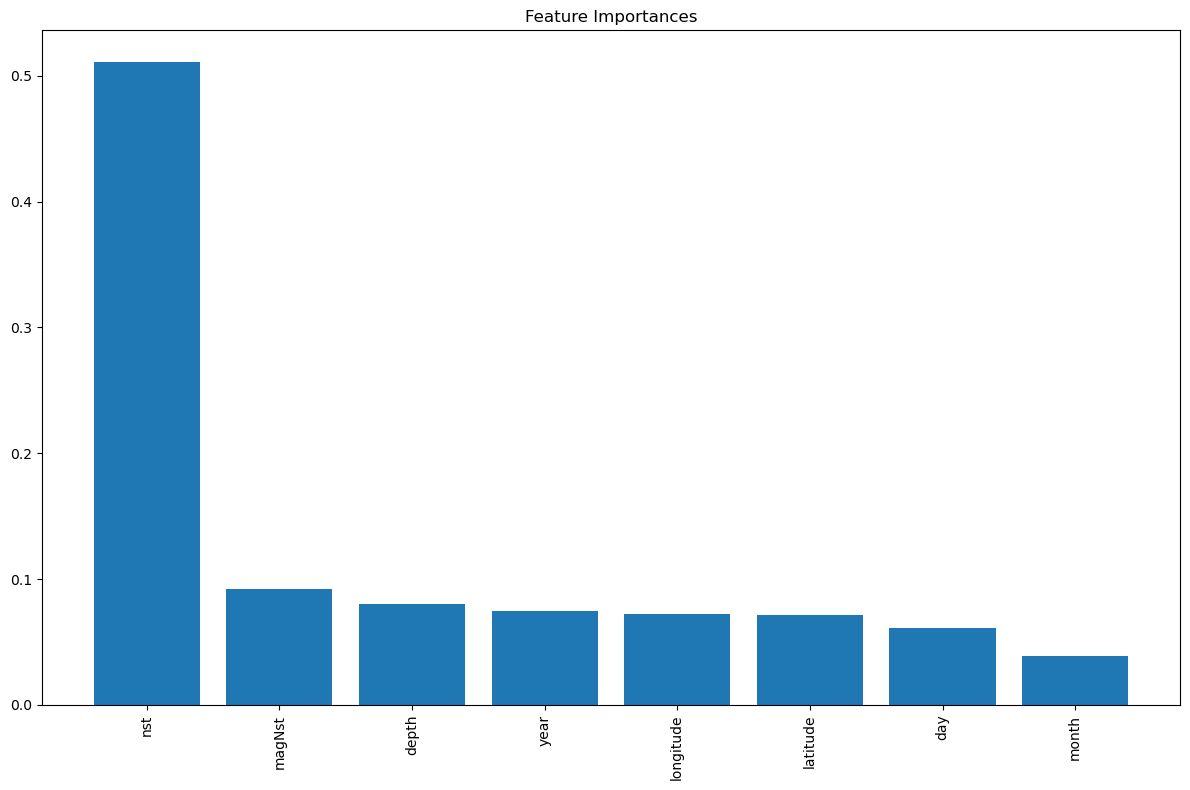

In [55]:

feature_importances = rf_model.feature_importances_

# feature importance in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# labels sorted according to their importance
sorted_labels = [X_train.columns[i] for i in sorted_indices]


plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(sorted_labels)), sorted_labels, rotation=90)
plt.tight_layout()
plt.show()


## This bar chart visualises feature importances derived from a Random Forest model, which ranks the features based on how useful they are at predicting the target variable, in this case, likely the earthquake magnitude.

## The most significant feature by a considerable margin is 'nst', which typically represents the number of reporting stations or observations that contribute to a seismic reading. Its high importance indicates that the more data points or observations from different stations there are, the more accurate the prediction of the earthquake's magnitude will be. 

## Additionally,  for our project on earthquake magnitude prediction, this implies that models which include data from a large network of stations could be more precise, highlighting the value of extensive and diverse data collection in seismology